# P3

In [1]:
%load_ext autoreload

## Mínimos cuadrados

La ecuación de la línea es:

$ y(x) = a_1 x + a_0 $

Al aplicar el método de interpolación por mínimos cuadrados queda el siguiente sistema de ecuaciones:


$( \sum_i (y_i - a_1 x_i - a_0) , \sum_i (y_i - a_1 x_i - a_0)x_i ) = 0$


En caso de la ecuación de segundo grado:
$  f(x) = a x^2+ b x+c $

se obtiene 
$ ( \sum (y_i - a x_i^2 - b x_i -c ) ( x_i^2) ,  \sum (y_i - a x_i^2 - b x_i  -c) ( x_i), \sum (y_i - a x_i^2 - b x_i  -c )  ) = 0 $


In [2]:
# Derivadas parciales
# ####################################################################
def der_parcial_1(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 1 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """
    # COMPLETAR
    c_0 = len(xs)
    c_1 = sum(xs)
    c_ind = sum(ys)
    
    return (c_1, c_0, c_ind)


def der_parcial_0(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 0 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """
    # COMPLETAR

    c_1 = 0
    c_0 = sum(xs)
    c_ind = 0

    for xi,yi in zip(xs,ys):
        c_1 += (xi * xi)
        c_ind += (xi + yi)


    return (c_1, c_0, c_ind)

## Conjunto de datos 1

In [3]:
xs = [
    1.1715,
    1.3396,
    1.4163,
    1.9962,
    2.2523,
    2.2947,
    2.5793,
    2.7054,
    2.7635,
    2.8200,
    3.0317,
    3.5111,
    3.5393,
    3.9829,
    4.0323,
    4.1353,
    4.2084,
    4.4683,
    4.6509,
    4.7489,
]


ys = [
    1.1902,
    0.9564,
    0.6078,
    -0.0856,
    -0.3550,
    0.1355,
    -0.3171,
    -0.3425,
    -0.3758,
    -0.1518,
    -0.2767,
    0.6251,
    0.6447,
    2.2733,
    2.1789,
    2.6781,
    2.3818,
    3.3786,
    4.4971,
    5.1431,
]

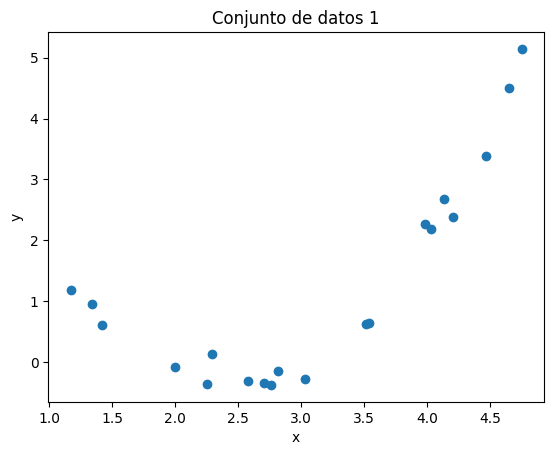

In [4]:
import matplotlib.pyplot as plt

plt.scatter(xs, ys)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Conjunto de datos 1")
plt.show()

In [5]:
%autoreload 2
from src import ajustar_min_cuadrados
#Descomentar para probar la función

pars = ajustar_min_cuadrados(xs, ys, gradiente=[der_parcial_0, der_parcial_1])
pars # parámetros de la curva ajustada

[08-14 09:16:33][INFO] 2024-08-14 09:16:33.050204
[08-14 09:16:33][INFO] 2024-08-14 09:16:33.058951
[08-14 09:16:33][INFO] 2024-08-14 09:16:33.064892
[08-14 09:16:33][INFO] 2024-08-14 09:16:33.099428
[08-14 09:16:33][INFO] Se ajustarán 2 parámetros.
[08-14 09:16:33][INFO] 
[[61.6479     20.         24.7861    ]
 [ 0.         -7.83899109  0.31854843]]


array([ 0.4152425 , -0.04063641])

In [6]:
pars

array([ 0.4152425 , -0.04063641])

In [7]:
def fun_lin(x):
    return x*pars[0] + pars[1]

In [8]:
import numpy as np
y_lin_pred = []
for xi in xs:
    y_lin_pred.append(fun_lin(xi))


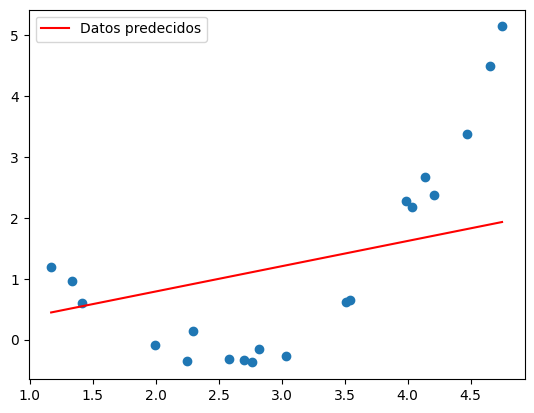

In [9]:
fig, ax = plt.subplots()
ax.scatter(xs, ys)
ax.plot(xs, y_lin_pred, color='red', label='Datos predecidos')
ax.legend()

In [10]:
# ####################################################################
def linea(x: float, pars: tuple[float]) -> float:
    """Ecuación de la recta y = a1 * x + a0.

    ## Parameters

    ``x``: valor de x.

    ``pars``: parámetros de la recta. Deben ser de la forma (a1, a0).

    ## Return

    ``y``: valor de y.

    """
    a1, a0 = pars
    return a1 * x + a0

In [11]:
# ####################################################################
def der_parcial_0_parabol(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 0 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_2 * a_2 + c_1 * a_1 + c_0 * a_0 = c_ind    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_2``: coeficiente del parámetro 2.

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """
    # COMPLETAR
    c_0 = len(ys)
    c_1 = sum(xs)
    c_2 = 0
    c_ind = sum(ys)
    for xi in xs:
        c_2 += xi * xi

    return (c_2, c_1, c_0, c_ind)


# ####################################################################
def der_parcial_1_parabol(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 1 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_2 * a_2 + c_1 * a_1 + c_0 * a_0 = c_ind    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_2``: coeficiente del parámetro 2.

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """
    # COMPLETAR
    c_0 = sum(xs)
    c_1 = 0
    c_2 = 0
    c_ind = 0

    for xi,yi in zip(xs,ys):
        c_ind += xi *yi
        c_1 += xi * xi
        c_2 += xi * xi* xi

    return(c_2, c_1, c_0, c_ind)


# ####################################################################
def der_parcial_2_parabol(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 2 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:    c_2 * a_2 + c_1 * a_1 + c_0 * a_0 = c_ind

    ## Parameters
    ``xs``: lista de valores de x.
    ``ys``: lista de valores de y.
    ## Return
    ``c_2``: coeficiente del parámetro 2.
    ``c_1``: coeficiente del parámetro 1.
    ``c_0``: coeficiente del parámetro 0.
    ``c_ind``: coeficiente del término independiente.
    """

    # COMPLETAR
    c_0 = sum(xs)
    c_1 = 0
    c_2 = 0
    c_ind = 0

    for xi,yi in zip(xs,ys):
        c_0 += xi * xi
        c_ind += xi *xi *yi
        c_1 += xi * xi * xi
        c_2 += xi * xi * xi * xi

    return(c_2, c_1, c_0, c_ind)

In [12]:
def cuadratica(x: float, pars: tuple[float]) -> float:
    a2, a1, a0 = pars
    return a2 * x**2 + a1 * x + a0

In [13]:
pars_cuad = ajustar_min_cuadrados(
    xs,
    ys,
    gradiente=[der_parcial_0_parabol, der_parcial_1_parabol, der_parcial_2_parabol],
)
print(pars_cuad)

[08-14 09:16:34][INFO] Se ajustarán 3 parámetros.
[08-14 09:16:34][INFO] 
[[ 214.18604567   61.6479       20.           24.7861    ]
 [   0.          -17.57011186  -13.53914045    9.4986119 ]
 [   0.         -112.51779515  -21.89510563   78.89917291]]
[08-14 09:16:34][INFO] 
[[214.18604567  61.6479      20.          24.7861    ]
 [  0.         -17.57011186 -13.53914045   9.4986119 ]
 [  0.           0.          64.80862415  18.07071169]]
[ 0.30712937 -0.75547363  0.2788319 ]


In [14]:
def fun_parabola(x):
    return pars_cuad[0]*x**2 + pars_cuad[1]*x + pars_cuad[2]

In [15]:
y_pred_parab = []
for xi in xs:
    y_pred_parab.append(fun_parabola(xi))

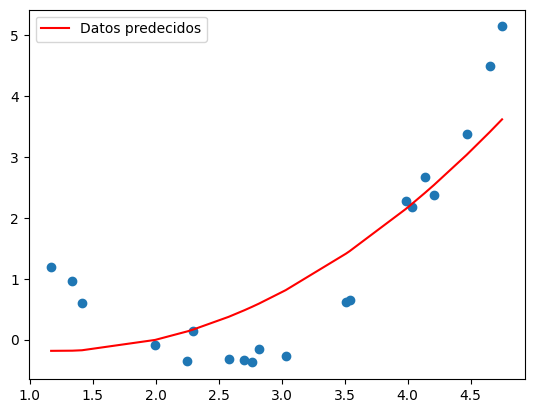

In [16]:
fig, ax = plt.subplots()
ax.scatter(xs, ys)
ax.plot(xs, y_pred_parab, color='red', label='Datos predecidos')
ax.legend()

Su imagen debe ser similar a:

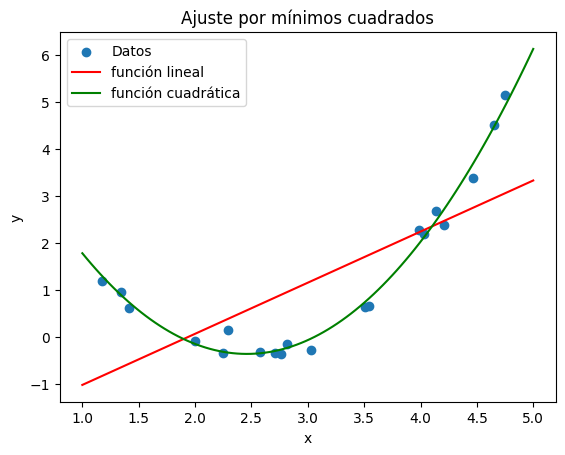

# Indicaciones
Su trabajo es ajustar el código para utilizar una función lineal y una cuadrática que aproxime los puntos. Tenga en cuenta las siguientes consideraciones:
* Usar el método de mínimos cuadrados para interpolar los puntos.
* Graficar la función cuadrática y los puntos dados.
* Modificar y utilizar SOLO el código provisto. No se aceptarán la utilización de otras librerías o funciones.